In [1]:
#Connecting G drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [26]:
import numpy as np
#Samples to work on
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# Making tokens from samples each having max length of 10 ASCII letter
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
      max_length = 10
      #Generating boolean matrix for each token 
      results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))
      for i, sample in enumerate(samples):
        for j, word in list(enumerate(sample.split()))[:max_length]:
          index = token_index.get(word)
          results[i, j, index] = 1.
      print(token_index)

{'The': 1}
{'The': 1, 'cat': 2}
{'The': 1, 'cat': 2, 'sat': 3}
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4}
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5}
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6}
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7}
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8}
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9}
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}


In [27]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
#Taking all ASCII characters into account
characters = string.printable
print(characters)
#Tokenizing ASCII characters
token_index = dict(zip(range(1, len(characters) + 1), characters))
print(token_index)
max_length = 50
#Creating boolean matrix for sample tokens having max length of 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 91: '{', 92: '|', 93: '}', 94: '~', 95: ' ', 96: '\t', 97: '\n', 98: '\r', 99: '\x0b', 100: '\x0c

In [28]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
#Taking top 1000 words from the preprocessed tokens as foundation
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
#Assigning unique indexs to sample tokens
sequences = tokenizer.texts_to_sequences(samples)
print(sequences)
#Generating one hot encoding for each samples
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print(word_index)
print('Found %s unique tokens.' % len(word_index))

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
Found 9 unique tokens.


In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

In [0]:
from keras.layers import Embedding
#Forming an embedding layer with 1000 token in 64 dimension
embedding_layer = Embedding(1000, 64)

In [0]:
# Importing IMDB dataset with positive and negative reviews
from keras.datasets import imdb
from keras import preprocessing
# Making 10000 word train/test dataset with max 20 length with pad per review sequence
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [32]:
#Model where we are converting the sample of 20 length to 8 dimension using embedding layer
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.6662 - acc: 0.6270 - val_loss: 0.6123 - val_acc: 0.7002
Epoch 2/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.5360 - acc: 0.7528 - val_loss: 0.5228 - val_acc: 0.7306
Epoch 3/10
20000/20000 [==============================] -

In [9]:
!unzip '/content/gdrive/My Drive/TextEmbedding/aclImdb.zip'

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb/train/pos/4326_7.txt  
  inflating: aclImdb/train/pos/4333_10.txt  
  inflating: aclImdb/train/pos/4348_7.txt  
  inflating: aclImdb/train/pos/4356_8.txt  
  inflating: aclImdb/train/pos/4369_9.txt  
  inflating: aclImdb/train/pos/436_10.txt  
  inflating: aclImdb/train/pos/4383_9.txt  
  inflating: aclImdb/train/pos/4398_9.txt  
  inflating: aclImdb/train/pos/4415_10.txt  
  inflating: aclImdb/train/pos/4422_8.txt  
  inflating: aclImdb/train/pos/4446_10.txt  
  inflating: aclImdb/train/pos/445_10.txt  
  inflating: aclImdb/train/pos/4476_9.txt  
  inflating: aclImdb/train/pos/4481_8.txt  
  inflating: aclImdb/train/pos/4491_10.txt  
  inflating: aclImdb/train/pos/4513_8.txt  
  inflating: aclImdb/train/pos/4519_9.txt  
  inflating: aclImdb/train/pos/4520_7.txt  
  inflating: aclImdb/train/pos/4530_7.txt  
  inflating: aclImdb/train/pos/4539_9.txt  
  inflating: aclImdb/train/pos/4541_10.txt  
  inflating: aclImdb

In [0]:
import os
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
# Labeling the dataset reviews to 'neg' and 'pos' for classification
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [0]:
#Tokening the raw text with max lebgth of 100 with 8000 samples and top 10000 foundation words
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 8000
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [35]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
# Mixing up neg and pos reviews and making train/test split
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [13]:
!unzip '/content/gdrive/My Drive/TextEmbedding/glove.6B.zip'

Archive:  /content/gdrive/My Drive/TextEmbedding/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [36]:
# Parsing the precomputed glove word embeddings
# Glove file we are using is 400000 works in 100 dimension
glove_dir = '/content/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
# Assigning zero embedding to the words not present in embedding indexes
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [38]:
# Defining a model where every sample of 100 length is converted to 100 dimension
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Loading the pretrained word embedding and frezzing the said layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [40]:
#Training the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 291us/step - loss: 0.6937 - acc: 0.5689 - val_loss: 0.6594 - val_acc: 0.5987
Epoch 2/10
8000/8000 [==============================] - 2s 246us/step - loss: 0.5905 - acc: 0.6874 - val_loss: 0.6153 - val_acc: 0.6494
Epoch 3/10
8000/8000 [==============================] - 2s 247us/step - loss: 0.4817 - acc: 0.7750 - val_loss: 0.6345 - val_acc: 0.6688
Epoch 4/10
8000/8000 [==============================] - 2s 245us/step - loss: 0.4132 - acc: 0.8095 - val_loss: 0.6044 - val_acc: 0.6975
Epoch 5/10
8000/8000 [==============================] - 2s 250us/step - loss: 0.3476 - acc: 0.8488 - val_loss: 0.6067 - val_acc: 0.7056
Epoch 6/10
8000/8000 [==============================] - 2s 249us/step - loss: 0.3071 - acc: 0.8685 - val_loss: 0.6485 - val_acc: 0.7069
Epoch 7/10
8000/8000 [==============================] - 2s 245us/step - loss: 0.2686 - acc: 0.8861 - val_loss: 0.6941 - val_acc: 0.6992

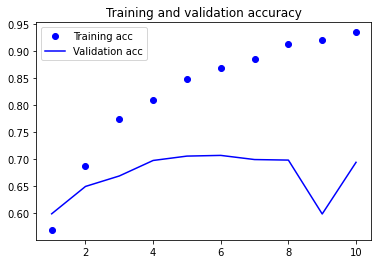

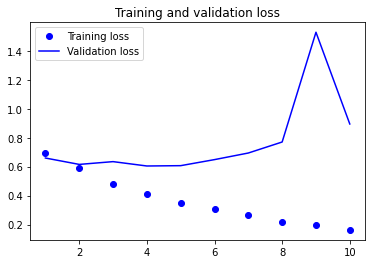

In [41]:
# Training and Validation Accuracy and loss using pretrained word embedding
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
#Training the same above model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 5s 601us/step - loss: 0.5394 - acc: 0.7164 - val_loss: 0.3848 - val_acc: 0.8254
Epoch 2/10
8000/8000 [==============================] - 4

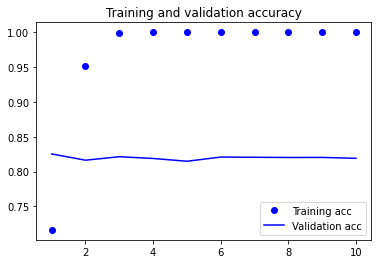

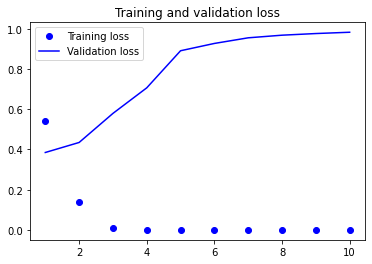

In [43]:
# Training and Validation Accuracy and loss without using pretrained word embedding
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Tokenzing the test dataset
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [0]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [46]:
# Evaluating the model
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 49us/step


[0.9145144889330864, 0.6882]